In [2]:
# Importing the required libraries

import re
import pandas as pd

In [3]:
# Opening the new text file

f = open(r"path\to\file",'r',encoding='utf-8')

In [4]:
data = f.read()

In [ ]:
print(data)

In [6]:
# Finding patterens in the textual data using regular expression
messages = re.findall('(\d+/\d+/\d+, \d+:\d+\d)+ ([a-z]*) - (.*?): (.*)', data)

#Convert list to a dataframe and name the columns
df = pd.DataFrame(messages,columns=['date_time',"time_format",'name','message'])

# Converting dates to the proper format
df['date'] = pd.to_datetime(df['date_time'],format="%d/%m/%y, %H:%M")

In [7]:
# Extracting the year part from the date column
df["year"] = df["date"].dt.year

In [8]:
# Extracting the month part from the date
df["month"] = df["date"].dt.month_name()

In [9]:
# Extracting the day from the date
df['day'] = df['date'].dt.day

In [10]:
# Extracting the hour part from date
df['hour'] = df['date'].dt.hour

In [11]:
# Extracting the minute part from date
df['minute'] = df['date'].dt.minute

In [ ]:
df.head()

In [13]:
words = []
for message in df['message']:
    words.extend(message.split())

In [14]:
len(words)

1422

In [15]:
from urlextract import URLExtract
extractor = URLExtract()

links = []

for messages in df['message']:
    links.extend(extractor.find_urls(messages))

In [16]:
len(links)

4

In [17]:
x = df['name'].value_counts().head(5)

In [18]:
import matplotlib.pyplot as plt

name = x.index
count = x.values

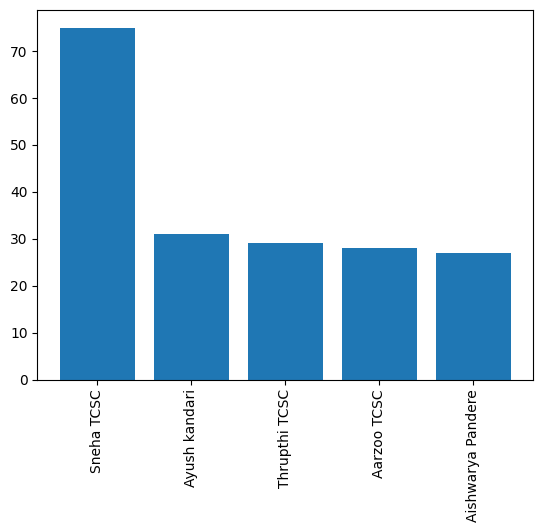

In [19]:
plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
round((df['name'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','name':'percent'})

In [21]:
words = []

for message in df['message']:
    words.extend(message.split())

In [22]:
temp = df[df["message"] != '<Media omitted>']

In [ ]:
f = open("stop_hinglish.txt",'r')
stop_words = f.read()
temp

In [ ]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    words.extend(message.split())
words

In [25]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,hai,41
1,nahi,20
2,permission,17
3,?,16
4,hi,16
5,na,15
6,hain,15
7,kya,14
8,ka,14
9,bhi,14


In [44]:
import emoji

def extract_emojis(message):
  return ''.join(c for c in message if c in emoji.EMOJI_DATA)

In [45]:
extract_emojis(df["message"])

'😂😂😂👍🏻😁😂🤔🙋\u200d♂️'

In [41]:
%pip install UNICODE_EMOJI

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement UNICODE_EMOJI (from versions: none)
ERROR: No matching distribution found for UNICODE_EMOJI


In [46]:
emojis = []

for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [47]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,16
1,❤,9
2,🏻,8
3,🕺,6
4,🤣,5
5,🥳,5
6,🙏,4
7,✨,4
8,☺,4
9,🥹,3


In [ ]:
df["month_num"] = df["date"].dt.month
df

In [54]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [55]:
timeline

,year,month_num,month,message
0,2022,12,December,109
1,2023,1,January,185


In [58]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline["month"][i] + '-'+ str(timeline['year'][i]))

In [59]:
time

['December-2022', 'January-2023']

In [60]:
timeline['time'] = time

In [61]:
timeline

,year,month_num,month,message,time
0,2022,12,December,109,December-2022
1,2023,1,January,185,January-2023


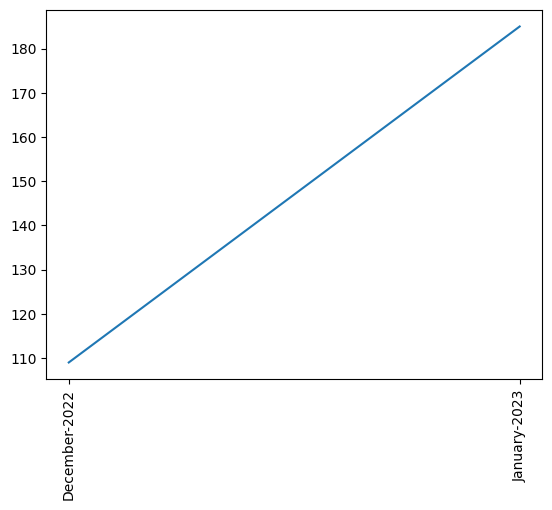

In [63]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
df["date_num"] = df['date'].dt.date

In [67]:
daily_timeline = df.groupby('date_num').count()['message'].reset_index()

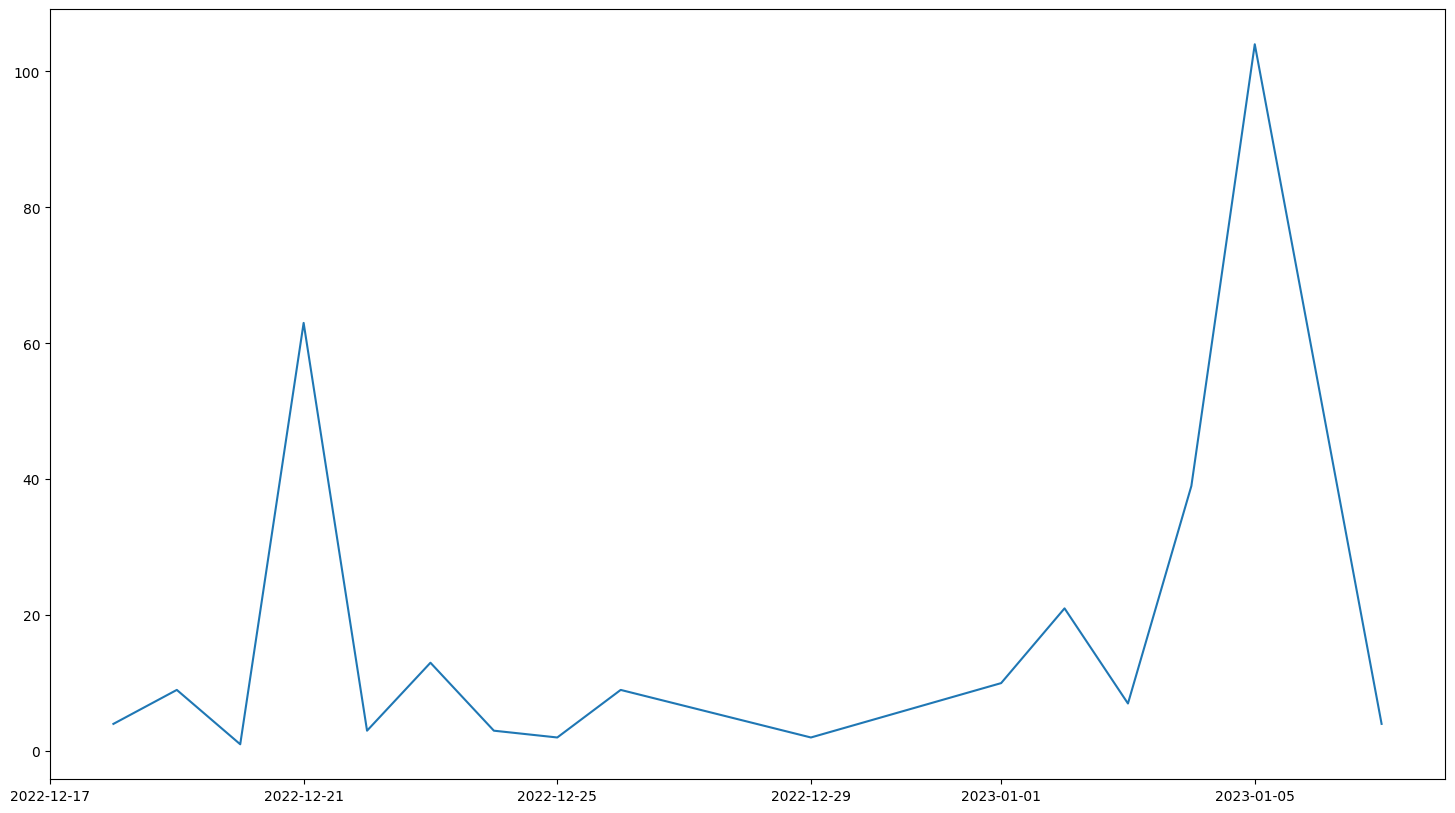

In [69]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['date_num'],daily_timeline['message'])

In [73]:
df['day_name'] = df['date'].dt.day_name()

In [75]:
df['day_name'].value_counts()

Thursday     109
Wednesday    102
Monday        39
Sunday        16
Friday        13
Tuesday        8
Saturday       7
Name: day_name, dtype: int64

In [76]:
period = []

for hour in df[['day_name','hour']]['hour']:
    if hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))


In [ ]:
period

In [ ]:
df

In [79]:
df['period'] = period

In [ ]:
df